# 01 - Import Librairies

In [1]:
import os

In [2]:
print(os.getcwd())

C:\Users\maeva\OneDrive\Documents\Sujet1_Nguessan_Gasparin_Dutauziet_Asse\Partie_1


In [3]:
current_path = os.getcwd()

In [4]:
path = os.path.abspath(os.path.join(current_path, '..'))
path

'C:\\Users\\maeva\\OneDrive\\Documents\\Sujet1_Nguessan_Gasparin_Dutauziet_Asse'

In [5]:
path_data = os.path.join(path, 'data')
os.chdir(path_data)
print(os.getcwd())

C:\Users\maeva\OneDrive\Documents\Sujet1_Nguessan_Gasparin_Dutauziet_Asse\data


In [6]:
import pandas as pd
import numpy as np
import seaborn as sns 
from matplotlib import pyplot as plt
from datetime import datetime
import matplotlib.cm as cm #matplotlib.cm sert a mettre des couleurs plus jolies dans les graphs
from colorama import init, Fore, Back, Style
from modP1 import *

# 02 - Load Dataset

In [7]:
df_art=pd.read_csv("artists.csv",encoding="utf-8")
df_art.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,[],Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,[],ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,[],Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,[],Tra'gruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,[],Ioannis Panoutsopoulos,0


In [7]:
df_track=pd.read_csv("tracks.csv",encoding="utf-8")
df_track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [8]:
df_top200 = pd.read_csv("spotify_top200_global.csv",encoding="utf-8")
df_top200.head()

,Artist,Country,Date,Rank,Streams,Title
0,Tones And I,Global,2020-01-01,1,6155025,Dance Monkey
1,Arizona Zervas,Global,2020-01-01,2,4133489,ROXANNE
2,"KAROL G, Nicki Minaj",Global,2020-01-01,3,4017964,Tusa
3,Post Malone,Global,2020-01-01,4,3283180,Circles
4,Maroon 5,Global,2020-01-01,5,3127585,Memories


On a donc 3 dataframes:
- df_art : informations sur les artistes
- df_track : Informations des chansons présentes sur Spotify ( 1921-2020)
- df_top200 : les titres qui font partie du top200 mondial de l'année 2020

# 03 - Preprocessing and description  

Avant de procéder à l'analyse de données, nous allons analyser les dataframes pour voir les éventuelles valeurs manquantes, en savoir plus sur nos dataframes et faire du nettoyage de données.

### **Dataframe : df_art**

Ecrire une fonction permettant de faire l'info, le isnull et le describe pour chaque variable -> permet d'eviter la repetition 

In [36]:
data_summary(df_art)

Informations générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1162095 entries, 0 to 1162094
Data columns (total 5 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   id          1162095 non-null  object 
 1   followers   1162084 non-null  float64
 2   genres      1162095 non-null  object 
 3   name        1162095 non-null  object 
 4   popularity  1162095 non-null  int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 44.3+ MB


None



Valeurs manquantes dans le DataFrame:


id             0
followers     11
genres         0
name           0
popularity     0
dtype: int64



Statistiques descriptives du DataFrame:


,followers,popularity
count,1.162084e+06,1.162095e+06
mean,1.022070e+04,8.795961e+00
std,2.543995e+05,1.355777e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+01,0.000000e+00
50%,5.700000e+01,2.000000e+00
75%,4.170000e+02,1.300000e+01
max,7.890023e+07,1.000000e+02


#### **Description pour le dataframe df_art**  

nombre d'observation : 1 162 095

nombre de variable : 5

type de variable : Object, float et integer

variables manquantes : On a 11 valeurs manquantes pour la colonne followers.

### **Dataframe : df_top200**

In [11]:
data_summary(df_top200)

Informations générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73200 entries, 0 to 73199
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Artist   73200 non-null  object
 1   Country  73200 non-null  object
 2   Date     73200 non-null  object
 3   Rank     73200 non-null  int64 
 4   Streams  73200 non-null  int64 
 5   Title    73200 non-null  object
dtypes: int64(2), object(4)
memory usage: 3.4+ MB


None



Valeurs manquantes dans le DataFrame:


Artist     0
Country    0
Date       0
Rank       0
Streams    0
Title      0
dtype: int64



Statistiques descriptives du DataFrame:


,Rank,Streams
count,73200.0000,7.320000e+04
mean,100.5000,1.300491e+06
std,57.7347,8.900651e+05
min,1.0000,5.578390e+05
25%,50.7500,7.678645e+05
50%,100.5000,9.755045e+05
75%,150.2500,1.486872e+06
max,200.0000,1.722324e+07



**Description pour le dataframe df_top200** 

nombre d'observation : 73 200

nombre de variable : 6

type de variable : object et integer

valeurs manquantes : Aucune 


### **Dataframe : df_track**

In [12]:
data_summary(df_track)

Informations générales sur le DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586672 entries, 0 to 586671
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                586672 non-null  object 
 1   name              586601 non-null  object 
 2   popularity        586672 non-null  int64  
 3   duration_ms       586672 non-null  int64  
 4   explicit          586672 non-null  int64  
 5   artists           586672 non-null  object 
 6   id_artists        586672 non-null  object 
 7   release_date      586672 non-null  object 
 8   danceability      586672 non-null  float64
 9   energy            586672 non-null  float64
 10  key               586672 non-null  int64  
 11  loudness          586672 non-null  float64
 12  mode              586672 non-null  int64  
 13  speechiness       586672 non-null  float64
 14  acousticness      586672 non-null  float64
 15  instrumentalness  586672 no

None



Valeurs manquantes dans le DataFrame:


id                   0
name                71
popularity           0
duration_ms          0
explicit             0
artists              0
id_artists           0
release_date         0
danceability         0
energy               0
key                  0
loudness             0
mode                 0
speechiness          0
acousticness         0
instrumentalness     0
liveness             0
valence              0
tempo                0
time_signature       0
dtype: int64



Statistiques descriptives du DataFrame:


,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,586672.000000,5.866720e+05,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000,586672.000000
mean,27.570053,2.300512e+05,0.044086,0.563594,0.542036,5.221603,-10.206067,0.658797,0.104864,0.449863,0.113451,0.213935,0.552292,118.464857,3.873382
std,18.370642,1.265261e+05,0.205286,0.166103,0.251923,3.519423,5.089328,0.474114,0.179893,0.348837,0.266868,0.184326,0.257671,29.764108,0.473162
min,0.000000,3.344000e+03,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,1.750930e+05,0.000000,0.453000,0.343000,2.000000,-12.891000,0.000000,0.034000,0.096900,0.000000,0.098300,0.346000,95.600000,4.000000
50%,27.000000,2.148930e+05,0.000000,0.577000,0.549000,5.000000,-9.243000,1.000000,0.044300,0.422000,0.000024,0.139000,0.564000,117.384000,4.000000
75%,41.000000,2.638670e+05,0.000000,0.686000,0.748000,8.000000,-6.482000,1.000000,0.076300,0.785000,0.009550,0.278000,0.769000,136.321000,4.000000
max,100.000000,5.621218e+06,1.000000,0.991000,1.000000,11.000000,5.376000,1.000000,0.971000,0.996000,1.000000,1.000000,1.000000,246.381000,5.000000


#### **Description pour le dataframe df_track** 

nombre d'observation : 586 672

nombre de variable : 21

type de variable : float, object, integer

valeurs manquantes : On a 71 valeurs manquantes pour la colonne name. 


## Data cleaning : df_track

Pour simplifier les questions suivantes, nous allons supprimer les crochets et les apostrophes.

In [9]:
# Remplacer les crochets "[" et "]" par une chaîne vide dans toutes les colonnes
df_track = df_track.replace(to_replace=r'\[|\]', value='', regex=True)
# On enleve les apostrophes
df_track = df_track.replace(to_replace="'", value='', regex=True)

df_track.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,Fernando Pessoa,14jtPCOoNZwquk5wd9DxrY,1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,Ignacio Corsini,5LiOoJbxVSAMkBS2fUm3X2,1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,Dick Haymes,3BiJGZsyX9sJchTqcSA7Su,1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


##  Data cleaning : df_art 

In [10]:
# Remplacer les crochets "[" et "]" par une chaîne vide dans toutes les colonnes
df_art= df_art.replace(to_replace=r'\[|\]', value='', regex=True)
# On enleve les apostrophes
df_art = df_art.replace(to_replace="'", value='', regex=True)

df_art.head()

,id,followers,genres,name,popularity
0,0DheY5irMjBUeLybbCUEZ2,0.0,,Armid & Amir Zare Pashai feat. Sara Rouzbehani,0
1,0DlhY15l3wsrnlfGio2bjU,5.0,,ปูนา ภาวิณี,0
2,0DmRESX2JknGPQyO15yxg7,0.0,,Sadaa,0
3,0DmhnbHjm1qw6NCYPeZNgJ,0.0,,Tragruda,0
4,0Dn11fWM7vHQ3rinvWEl4E,2.0,,Ioannis Panoutsopoulos,0


# 04 - Analyse univariée et bivariée

## A) Analyse univariée

Nous allons procéder à une analyse univariée pour chaque base de données. L'analyse univariée se focalise sur l'étude d'une seule variable à la fois, cherchant à comprendre les caractéristiques, la distribution, les statistiques et les comportements de cette variable de manière indépendante des autres.

### Description & visualisation : df_art

In [15]:
print(Fore.BLUE + Style.BRIGHT)
description(df_art)


Le dataframe df_art a 1162095 lignes et 5 colonnes

Les colonnes du dataframe sont: 
 
Index(['id', 'followers', 'genres', 'name', 'popularity'], dtype='object')

Les libellés et types de variables : 

id             object
followers     float64
genres         object
name           object
popularity      int64
dtype: object


#### Relation entre niveau de popularité de l'artiste et nombre de followers

,followers
popularity,
0,5.226097e+01
1,1.285263e+02
2,1.753016e+02
3,2.337437e+02
4,2.779250e+02
...,...
94,2.993322e+07
95,2.942828e+07
96,2.664293e+07


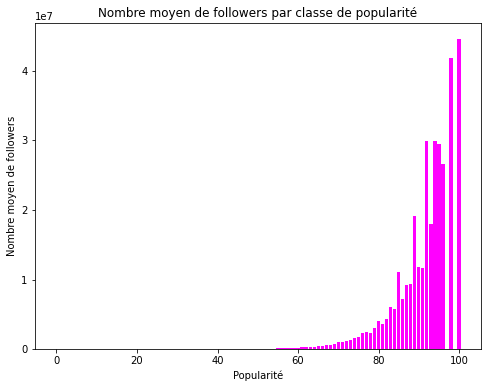

In [16]:
#On regroupe par popularité et on aggrege par la moyenne des followers
popularite_meanfollowers = df_art.groupby("popularity").agg({"followers": "mean"})
display(popularite_meanfollowers)

#On trace un graphique à barres
plt.figure(figsize=(8, 6))
plt.bar(popularite_meanfollowers.index, popularite_meanfollowers["followers"], color="magenta")
plt.xlabel("Popularité")
plt.ylabel("Nombre moyen de followers")
plt.title("Nombre moyen de followers par classe de popularité")

plt.show()

#### Artiste avec le plus et le moins de followers

In [17]:
print(Fore.BLUE + Style.BRIGHT)
xtrm_flw(df_art)


L'artiste avec le plus de followers est Ed Sheeran avec 78900234 followers.
L'artiste avec le moins de followers est Armid & Amir Zare Pashai feat. Sara Rouzbehani avec 0 followers.


### Description & visualisation : df_track

In [18]:
print(Fore.BLUE + Style.BRIGHT + "Description du DataFrame df_track:")
description(df_track)

Description du DataFrame df_track:
Le dataframe df_art a 586672 lignes et 20 colonnes

Les colonnes du dataframe sont: 
 
Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature'],
      dtype='object')

Les libellés et types de variables : 

id                   object
name                 object
popularity            int64
duration_ms           int64
explicit              int64
artists              object
id_artists           object
release_date         object
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_

#### Morceau le plus ancien/récent (par date de sortie)

In [19]:
print(Fore.BLUE + Style.BRIGHT + "Morceau le plus ancien/récent: \n  ")
old_new_song(df_track)

Morceau le plus ancien/récent: 
  
Le morceau le plus ancien est: Maldita sea la primera vez de Los Pincheira del Sur
Le morceau le plus récent est: The Circle Game - Live at The 2nd Fret, Philadelphia, PA, 11/1966 de Joni Mitchell


#### Nombre de chanson par niveau de popularité

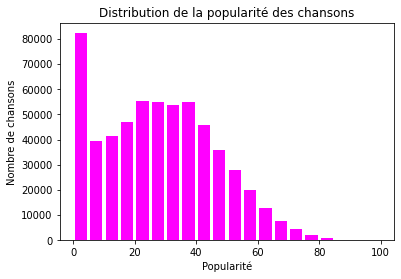

In [20]:
#On fait un histogramme
plt.hist(df_track['popularity'], bins=20, color = "magenta", rwidth=0.8)
plt.xlabel('Popularité')
plt.ylabel('Nombre de chansons')
plt.title('Distribution de la popularité des chansons')
plt.show()

**Commentaire** :  On constate une répartition hétérogène du nombre de chansons par popularité. On a une tendance à la baisse: il y a de moins en moins de chansons populaires pour les notes de popularité élévées et énormement de chansons pas populaires.

### Description  & visualisation : df_top200

In [21]:
print(Fore.BLUE + Style.BRIGHT )
description(df_top200)


Le dataframe df_art a 73200 lignes et 6 colonnes

Les colonnes du dataframe sont: 
 
Index(['Artist', 'Country', 'Date', 'Rank', 'Streams', 'Title'], dtype='object')

Les libellés et types de variables : 

Artist     object
Country    object
Date       object
Rank        int64
Streams     int64
Title      object
dtype: object


#### Morceau le plus écouté

In [22]:
print(Fore.BLUE + Style.BRIGHT )
maxminstream(df_top200)


Le morceau le plus streamé du TOP 200 Spotify est: All I Want for Christmas Is You de Mariah Care
Le morceau le moins streamé du TOP 200 Spotify est: Levitating de Dua Lipa


## B) Analyse bivariée

Apres avoir analysé indépendemment les dataframes, on va les analyser conjointement pour voir leur dynamique, en faisant une analyse bivariée. 
L'analyse bivariée est une méthode d'exploration de données qui examine les relations entre deux variables ou caractéristiques d'un ensemble de données. Elle vise à déterminer comment ces deux variables interagissent et influencent mutuellement leurs valeurs.

* ### df_track

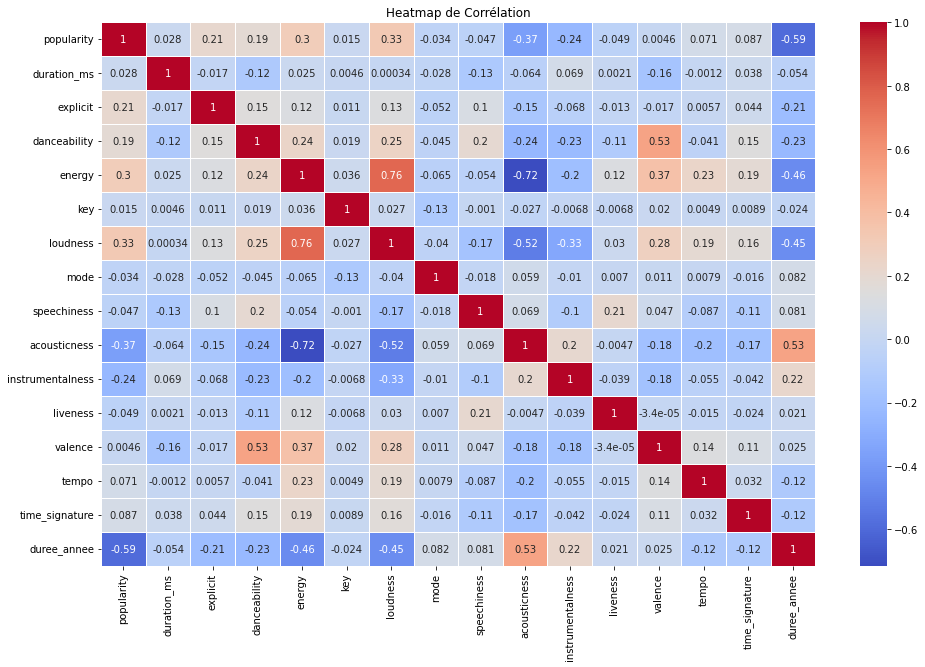

In [23]:
#visualisaton la corrélation entre toutes les colonnes 
visualize_correlation(df_track)

In [24]:
# On utilise la fonction pour effectuer l'analyse bivariée
column1 = "popularity"
column2 = "danceability"
correlation, commentaire = bivariate_analysis(df_track, "popularity", "danceability")
#On affiche la corrélation et le commentaire associée
print(Fore.BLUE + Style.BRIGHT )
print(f"Corrélation entre {column1} et {column2}: {correlation} \n")
print(commentaire)


Corrélation entre popularity et danceability: 0.18699972321301453 

('Il y a peu de corrélation entre les deux colonnes.', 'popularity', 'et', 'danceability')


* ### Dataframe: df_art

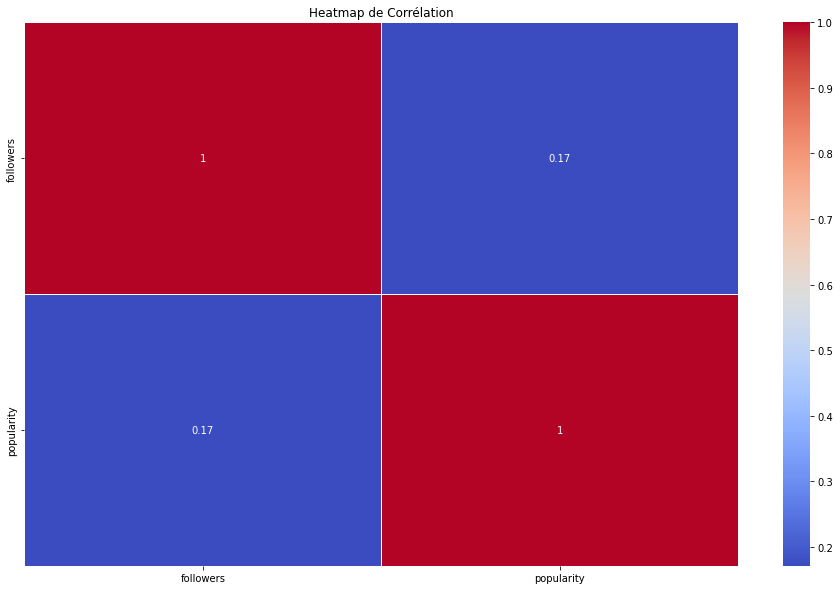

In [256]:
visualize_correlation(df_art)

Interprétation : On voit ici que le coefficient de corrélation entre niveau de popularité de l'artiste et nombre son nombre de followers est proche de 0. Autrement dit, lorsque le nombre de followers augmente, le niveau de popularité augmente moins que proportionnellement. L'exemple parfait est Ariana Grande qui a un niveau de popularité qui n'est "que" de 95, alors qu'elle est l'artiste qui possède le plus de followers : 61301006

* ### df_top200

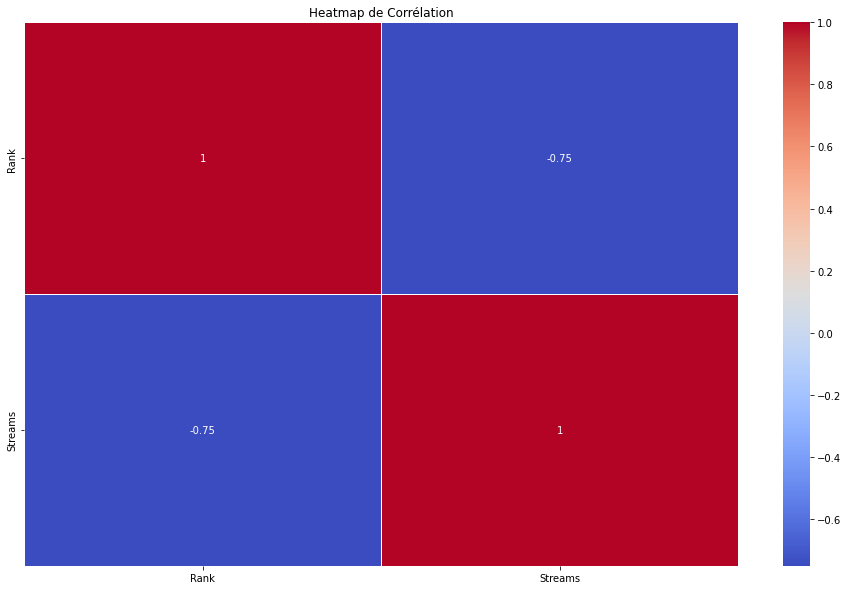

In [26]:
visualize_correlation(df_top200)

Interprétation : Le coefficient de corrélation entre rang du morceau dans le top 200 et nombre de streams est très proche de -1. Plus le nombre de streams est important, plus le rang élevé (proche du n°1).

# Partie 1 : Analyse descriptive des bases et visualisation:

In [11]:
#On se dirige vers le répertoire Partie1
path_partie1= os.path.join(path, 'Partie_1')
os.chdir(path_partie1)

In [12]:
print(os.getcwd())

C:\Users\maeva\OneDrive\Documents\Projet_pythonM1\Partie_1


### Question 1 : Quels sont les 10 artists les plus populaires?

Le but est de déterminer le top 10 des artistes les plus populaires du dataset. Puis de représenter graphiquement leur nombre d’abonnés par ordre décroissant.

Etape 1 : Pour cela, je me base sur le "df_artists" que je vais venir trier par ordre décroissant par rapport au rang de popularité. Cette méthode me permet d'obtenir par la suite les 10 artistes les plus populaires (les 10 ayant le rang de popularité le plus élevé)

Etape 2 : Je vais par la suite créer un 'sous'-df composé du top 10 (avec comme colonnes 'nom', 'rang de popularité' et 'nombre de followers') trié dans l'ordre décroissant par rapport au nombre de followers. Ce 'sous'-df (df_top10_popularite) me sert ensuite à représenter graphiquement le nombre de followers par ordre décroissant du top 10.

,name,popularity,followers
313676,Drake,98,54416812.0
144481,Justin Bieber,100,44606973.0
126338,Taylor Swift,98,38869193.0
115489,Bad Bunny,98,32244734.0
144484,BTS,96,31623813.0
144483,The Weeknd,96,31308207.0
144486,J Balvin,95,27286822.0
144487,Dua Lipa,95,24123468.0
115490,Juice WRLD,96,16996777.0
115491,Myke Towers,95,5001808.0


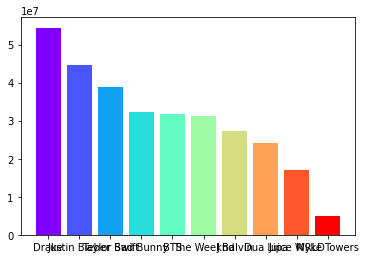

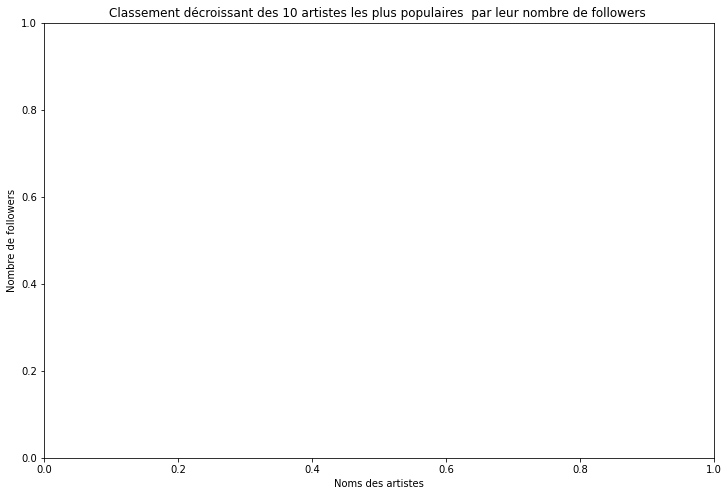

In [197]:
#On importe la fonction et on affiche le tableau ainsi que le graphique correspondant
result = top10_popularite(df_art)
display(result)

### Question 2 : Calculer le nombre de chansons sorties chaque année. Représenter graphiquement les résultats

Etape 1 : On s'assure que la colonne de date est correctement formatée dans le dataframe df_track, puis on extrait l'année de sortie de chaque morceau pour simplifier la visualisation.

Etape 2 : Ensuite, on groupe les morceaux par année et on compte le nombre de sorties chaque année. On utilise ces données pour créer un graphique représentant l'évolution du nombre de morceaux sortis par an, et on affiche également un tableau récapitulatif de ces chiffres.

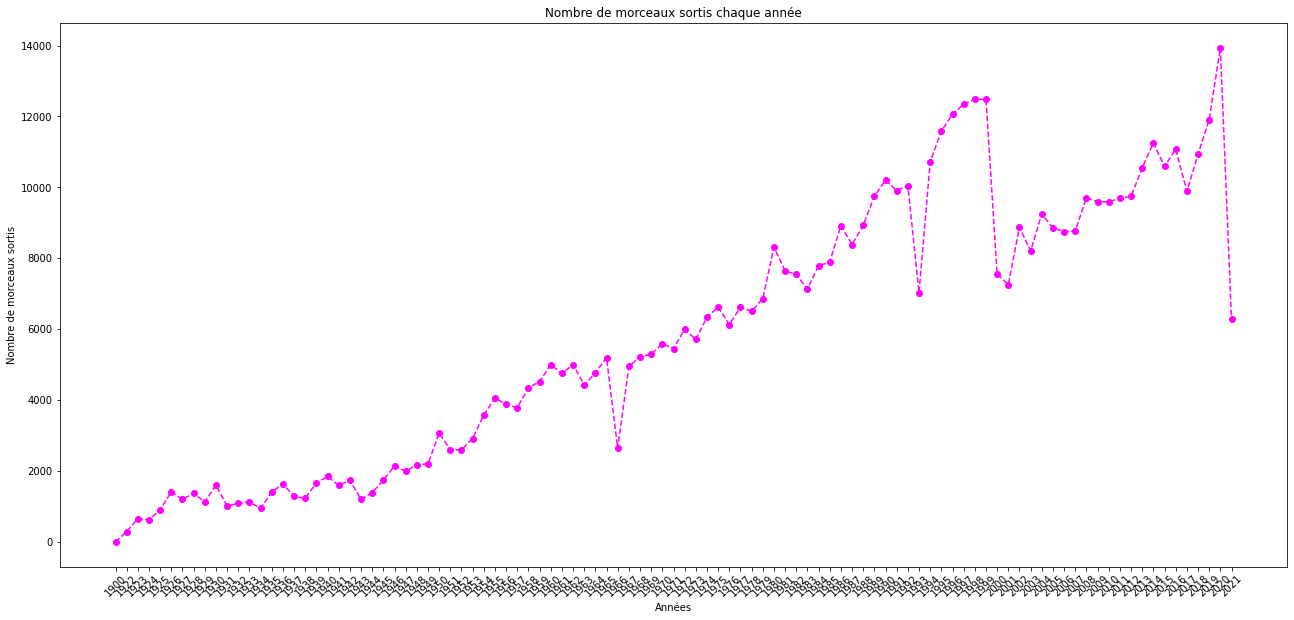

,id
release_year,
1900,1
1922,294
1923,657
1924,633
1925,903
...,...
2017,9889
2018,10936
2019,11907


None


In [163]:
chanson = chansonparannee()
print(chanson)

### Question 3  Quels artistes ont le plus de chansons distinctes dans le top 200 Global ? En cas d’égalité, les ordonner 

Étape 1 : Initialement, nous regroupons les données du DataFrame df_top200 par artiste en utilisant la fonction groupby. Nous calculons ensuite la somme totale des streams pour chaque artiste en utilisant la colonne "Streams". Le résultat est stocké dans le DataFrame sommestream, ce qui nous donne une vue consolidée des streams totaux par artiste.

Étape 2 : En groupant les chansons par artiste avec groupby sur les colonnes "Artist" et "Title", nous obtenons le nombre de chansons distinctes par artiste. Ensuite, nous renommons les colonnes du DataFrame résultant. Par la suite, la fusion des DataFrames sommestream et singleparartiste avec la clé "Artist" est effectuée. Enfin, le DataFrame résultant est trié en fonction du nombre de singles dans le top 200 et du total des streams, assurant la mise en avant des artistes les plus populaires.

Enfin, nous créons un graphique en barres pour visualiser les 10 artistes ayant le plus de chansons distinctes dans le top 200 de Spotify. Le graphique est configuré avec des étiquettes appropriées pour les axes x et y, ainsi qu'un titre descriptif.


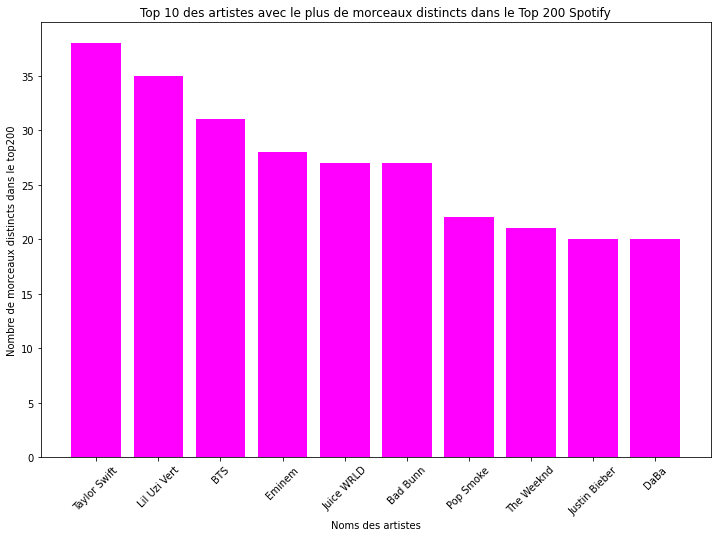

,Artist,Nombre de single dans le top200,Streams
678,Taylor Swift,38,1187762192
420,Lil Uzi Vert,35,681245839
69,BTS,31,1093588891
234,Eminem,28,780198094
340,Juice WRLD,27,2646394526
...,...,...,...
571,Portugal. The Man,1,601606
262,Guilherme & Benuto,1,601352
434,"Luis Fonsi, Daddy Yankee, Justin Bieber",1,589282
433,"Ludmilla, Topo La Maskara, Walshy Fire",1,588554


,Artist,Nombre de single dans le top200,Streams
678,Taylor Swift,38,1187762192
420,Lil Uzi Vert,35,681245839
69,BTS,31,1093588891
234,Eminem,28,780198094
340,Juice WRLD,27,2646394526
70,Bad Bunn,27,1613431336
568,Pop Smoke,22,1819047657
698,The Weeknd,21,2584034546
344,Justin Bieber,20,1777000385
177,DaBa,20,1406053145


None


In [164]:
chansons_dis= chansonsdistinctes()
print(chansons_dis)

### Question 4 : Existe-t-il un lien entre la popularité d’une chanson et les autres critères présents dans les données ? (Pour cette question ne pas considérer les variables de la table spotify_top200_global.csv)

Étape 1 : Initialement, nous calculons la corrélation entre la colonne spécifiée (column1) et toutes les autres colonnes du DataFrame df. Cette corrélation est stockée dans le DataFrame df_correlation avec les noms des variables et les valeurs de corrélation correspondantes.

Étape 2 : Ensuite, nous affichons visuellement la matrice de corrélation en utilisant la fonction visualize_correlation (qui n'est pas définie dans le code fourni). Pour chaque variable dans df_correlation, nous évaluons la force de corrélation avec column1 en utilisant des conditions spécifiques. Les commentaires sont imprimés en fonction de la force de corrélation, que ce soit forte, modérée, faible, positive ou négative.

In [44]:
#On fusionne les df_art et df_track avec pour clé les noms des artistes
fusion = pd.merge(df_track, df_art, left_on='artists', right_on='name', how='outer')

#On renomme les 'popularity' et les 'name' car il y en a deux, une pour la df_track et une pour la df_art
fusion = fusion.rename(columns={'name_x':'Song_title', 'name_y':'Artist_name', 'popularity_x':'popularity_track', 'popularity_y':'popularity_art'})

fusion

,id_x,Song_title,popularity_track,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,id_y,followers,genres,Artist_name,popularity_art
0,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903.0,0.0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.44500,...,0.744,0.151,0.127,104.851,3.0,45tIt06XoI0Iio4LBEVpls,91.0,,Uli,4.0
1,35iwgR4jXetI318WEWsa1Q,Carve,6.0,126903.0,0.0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.645,0.44500,...,0.744,0.151,0.127,104.851,3.0,2rgWCHFdRPECZBp9s9gU93,28721.0,,Uli,18.0
2,0PH9AACae1f957JAavhOl2,Lazy Boi,0.0,157333.0,0.0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.298,0.46000,...,0.856,0.436,0.402,87.921,4.0,45tIt06XoI0Iio4LBEVpls,91.0,,Uli,4.0
3,0PH9AACae1f957JAavhOl2,Lazy Boi,0.0,157333.0,0.0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.298,0.46000,...,0.856,0.436,0.402,87.921,4.0,2rgWCHFdRPECZBp9s9gU93,28721.0,,Uli,18.0
4,2SiNuAZ6jIU9xhClRKXcST,Sketch,0.0,87040.0,0.0,Uli,45tIt06XoI0Iio4LBEVpls,1922-02-22,0.634,0.00399,...,0.919,0.105,0.396,79.895,4.0,45tIt06XoI0Iio4LBEVpls,91.0,,Uli,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1751523,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3cOzi726Iav1toV2LRVEjp,4831.0,black comedy,Ali Siddiq,34.0
1751524,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,6LogY6VMM3jgAE6fPzXeMl,46.0,,Rodney Laney,2.0
1751525,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,19boQkDEIay9GaVAWkUhTa,257.0,,Blake Wexler,10.0
1751526,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,5nvjpU3Y7L6Hpe54QuvDjy,2357.0,black comedy,Donnell Rawlings,15.0


In [45]:
col1 = "popularity_track"
col2 = fusion.columns.difference([col1])

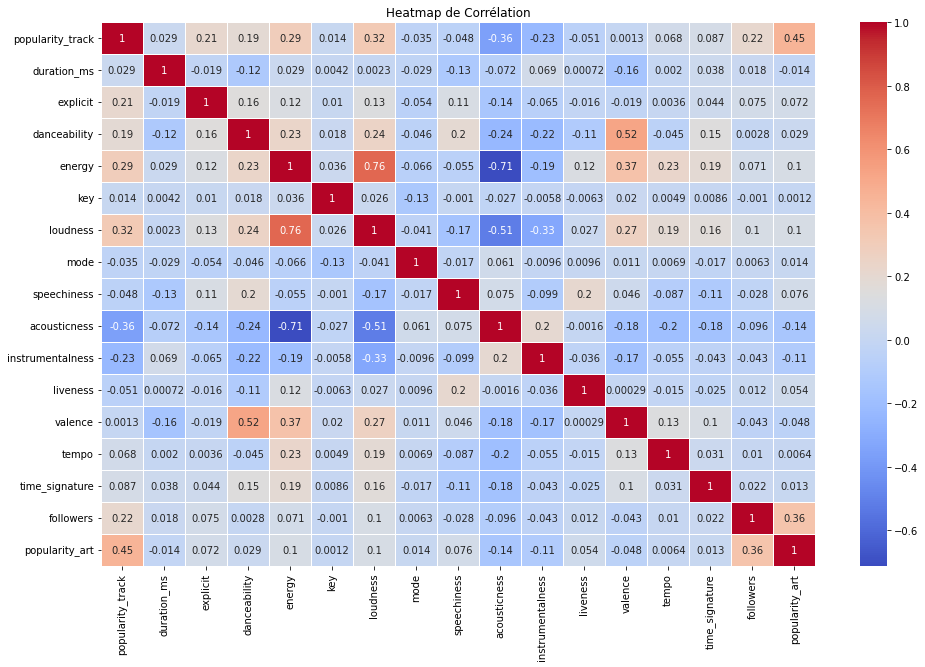

None
Pour la variable popularity_track, la corrélation avec popularity_track est de 1.0. Il existe une forte corrélation positive avec popularity_track.

Pour la variable acousticness, la corrélation avec popularity_track est de -0.3606117048355116. Il existe une corrélation négative modérée avec popularity_track.

Pour la variable danceability, la corrélation avec popularity_track est de 0.18644321930913862. Il y a peu de corrélation avec popularity_track.

Pour la variable duration_ms, la corrélation avec popularity_track est de 0.028703791501088618. Il y a peu de corrélation avec popularity_track.

Pour la variable energy, la corrélation avec popularity_track est de 0.29395507965638584. Il y a peu de corrélation avec popularity_track.

Pour la variable explicit, la corrélation avec popularity_track est de 0.2132271048296305. Il y a peu de corrélation avec popularity_track.

Pour la variable followers, la corrélation avec popularity_track est de 0.21599668959765578. Il y a peu de cor

In [51]:
correlation1 = correlation_pop(fusion,"popularity_track", col2)